In [ ]:
!pip install lime

In [ ]:
import torch
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from transformers import ViTFeatureExtractor, ViTForImageClassification

In [ ]:
# Load LIME explainer
explainer = lime_image.LimeImageExplainer()

# Load the saved model
model_path = "/content/drive/My Drive/VIT_model.pth"  # Update this if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

# Load model and apply saved weights
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,
    ignore_mismatched_sizes=True
)

model.load_state_dict(torch.load(model_path, map_location=device))  # Load trained weights
model.to(device)
model.eval()  # Set model to evaluation mode

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
# Define Image Transformation (same as your model input transformation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = "/content/drive/My Drive/Dataset4"

# Verify dataset structure
os.listdir(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Testing', 'Validation', 'Training', 'testing', 'processed', 'raw']

  0%|          | 0/1000 [00:00<?, ?it/s]

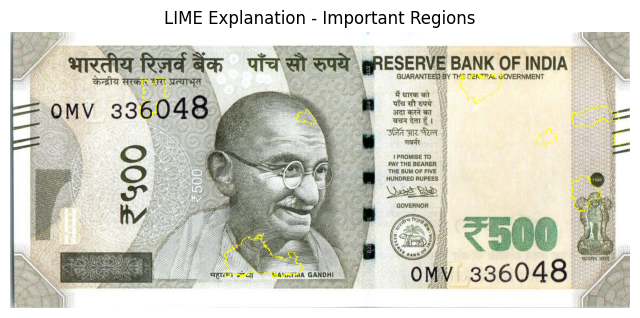

In [ ]:
# Function to predict probabilities for LIME
def predict_proba(images):
    inputs = feature_extractor(images=images, return_tensors="pt").to(device)  # Extract features
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs).logits  # Get model output
    probs = torch.nn.functional.softmax(outputs, dim=-1).cpu().numpy()  # Convert to probabilities
    return probs

# Select a sample image for explanation (update path if needed)
sample_image_path = "/content/drive/MyDrive/Dataset4/Training/Real/12.jpg"
sample_image = np.array(Image.open(sample_image_path))

# Generate LIME explanation
explanation = explainer.explain_instance(
    sample_image,
    predict_proba,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Get explanation for the top predicted class
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# Show the image with explanation
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation - Important Regions")
plt.axis("off")
plt.show()